# Problem Statement

The transmission line is the most crucial part of the power system. The requirement of power and its allegiance has grown up exponentially over the modern era, and the prominent role of a transmission line is to transmit electric power from the source area to the distribution network. The electrical power system consists of so many complex dynamic and interacting elements that are always prone to disturbance or an electrical fault.

The amount of electricity fed into the electricity grid must always be equal to the amount of electricity consumed, otherwise there's a black-out.

With the increase in renewable production, which can vary greatly depending on the weather, this has become much more complex.

Conventional power plants have to compensate for these constant fluctuations, especially since it is not possible to store electricity in large quantities over a long period of time.

To predict the fault in the Grid, Machine Learning Model is Being built.

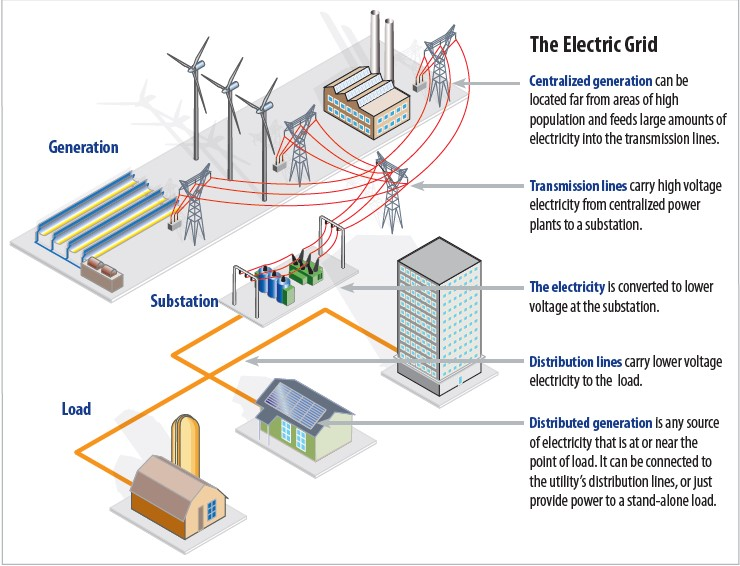

In [37]:
import warnings 
warnings.filterwarnings( "ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
df=pd.read_csv('classData.csv') # Reading Data

In [58]:
df.head() # Sample Dataset

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


### Inferences:-
1. Feature C,B, A are phase of three phase ckt and feature 'G' is ground condition.
2. Feature Ia, Ib, Ic are current in each phase of three phase ckt and Va, Vb,Vc are voltages of each phase of three phase ckt.

In [42]:
df.info() # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


### Inferences:-
1. All the features are of numerical type.
2. Data set does not contains missing values.

In [59]:
df.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [ ]:
df['fault_type']=df['G'].astype('str')+df['C'].astype('str')+df['B'].astype('str')+df['A'].astype('str')
df['fault_type'].astype('object') # Combining feature G, C,B,A as fault type in three phase ckt.

In [49]:
print(df.fault_type.value_counts().sort_values()) # Count of all type of fault

0110    1004
0111    1096
1001    1129
1111    1133
1011    1134
0000    2365
Name: fault_type, dtype: int64


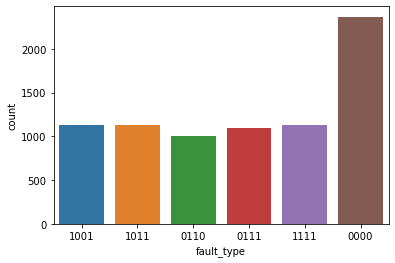

In [50]:
plt.figure()
sns.countplot(df.fault_type)
plt.show()

### Inferences:-
1. All classes except 0000, has nearly similar count.
2. It can be said classes are balanced.

In [44]:
df=df.drop(['G','C','B','A'], axis=1) # Dropping G, C, B, A features due to already combined as fault type.

In [45]:
numerical_features=df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].columns # Preparing separate list of numerical columns.

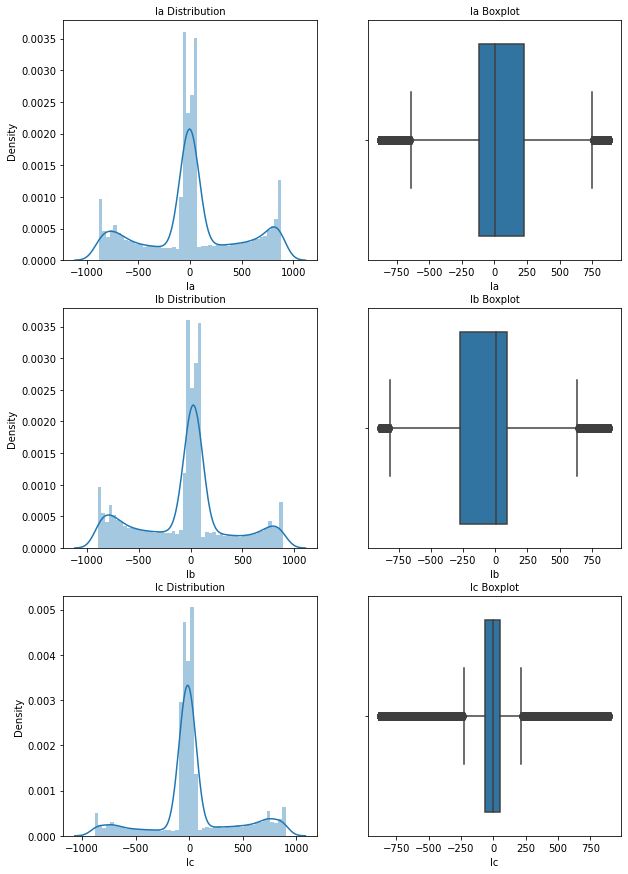

In [11]:
# Distribution and Box Plot for Current in Three Phases.
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,15)
a = sns.distplot(df['Ia'] , ax=axes[0][0])
a.set_title("Ia Distribution",fontsize=10)


a = sns.boxplot(df['Ia'] , orient = "v" , ax=axes[0][1])
a.set_title("Ia Boxplot",fontsize=10)

a = sns.distplot(df['Ib'] , ax=axes[1][0])
a.set_title("Ib Distribution",fontsize=10)


a = sns.boxplot(df['Ib'] , orient = "v" , ax=axes[1][1])
a.set_title("Ib Boxplot",fontsize=10)


a = sns.distplot(df['Ic'] , ax=axes[2][0])
a.set_title("Ic Distribution",fontsize=10)


a = sns.boxplot(df['Ic'] , orient = "v" , ax=axes[2][1])
a.set_title("Ic Boxplot",fontsize=10)

plt.show()

### Inferences:-
1. Current in all phases nearly normally distributed.
2. There are outliers in current of all three phases.

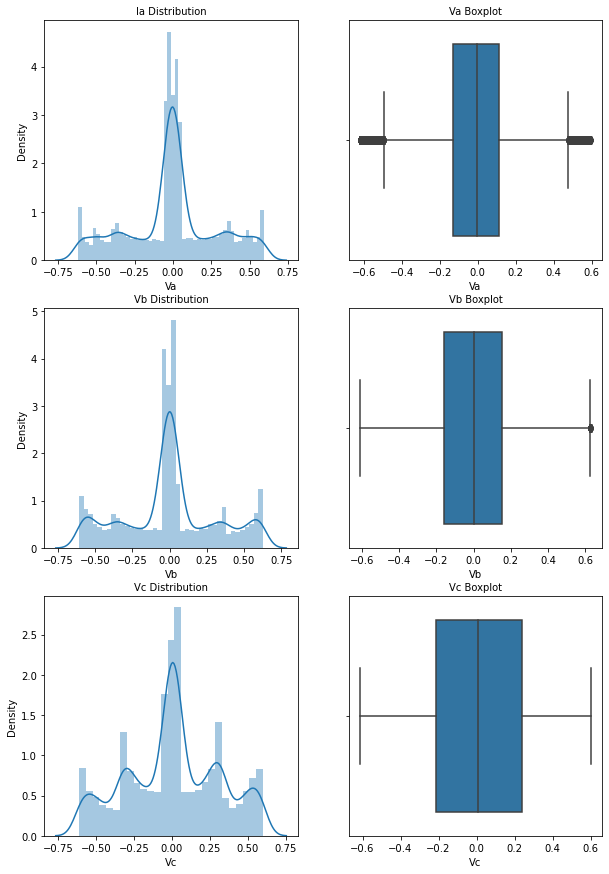

In [12]:
# Distribution and Box Plot for Voltage in Three Phases.
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,15)
a = sns.distplot(df['Va'] , ax=axes[0][0])
a.set_title("Ia Distribution",fontsize=10)


a = sns.boxplot(df['Va'] , orient = "v" , ax=axes[0][1])
a.set_title("Va Boxplot",fontsize=10)

a = sns.distplot(df['Vb'] , ax=axes[1][0])
a.set_title("Vb Distribution",fontsize=10)


a = sns.boxplot(df['Vb'] , orient = "v" , ax=axes[1][1])
a.set_title("Vb Boxplot",fontsize=10)


a = sns.distplot(df['Vc'] , ax=axes[2][0])
a.set_title("Vc Distribution",fontsize=10)


a = sns.boxplot(df['Vc'] , orient = "v" , ax=axes[2][1])
a.set_title("Vc Boxplot",fontsize=10)

plt.show()

### Inferences:-
1. Voltage in all phases nearly normally distributed.
2. 'A' phase voltage has more outliers in all three phases.

In [46]:
# Defining Quantiles
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

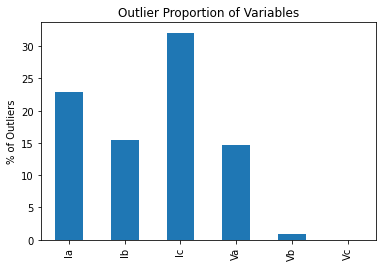

In [47]:
# Outlier Proportion Check
(((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100).plot(kind='bar')
plt.title('Outlier Proportion of Variables')
plt.ylabel('% of Outliers')
plt.show()

### Inferences:-
1. It can be seen that there are more outliers in current that voltages.
2. 'C' phase Current has more outliers in all three phases.

<Figure size 864x576 with 0 Axes>

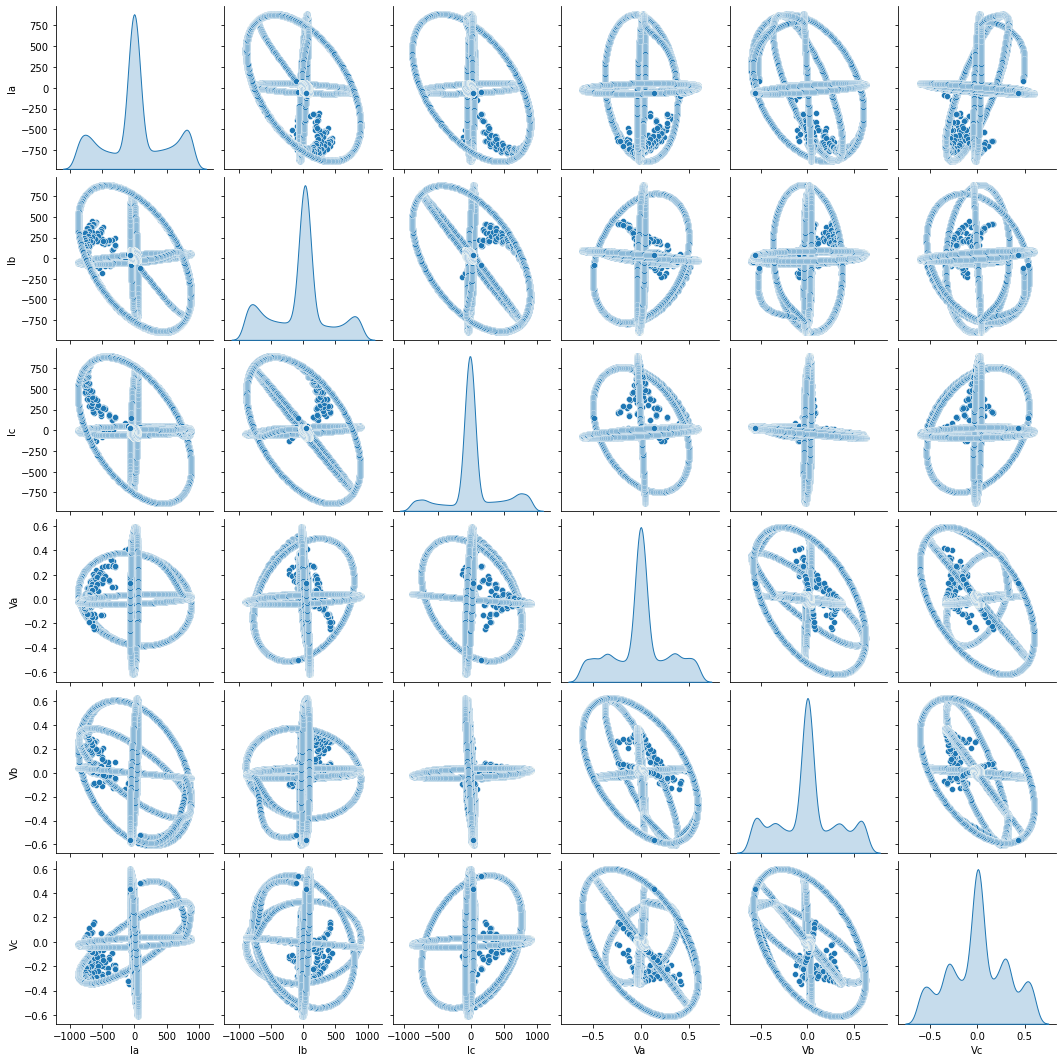

In [48]:
# Pair Plot to check relationship
plt.figure(figsize=(12,8))
sns.pairplot(df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']],diag_kind='kde')
plt.show()

### Inferences:-
1. It can be seen that all features has non linear relationship.


## The faults have been classified as follows:

- Line-Line(LL) fault,
- Line-Ground(LG) fault,
- Line-Line-Ground(LLG) fault,
- Line-Line-Line-Ground(LLLG) fault,
- Line-Line-Line(LLL) fault

- Ia, Ib, Ic and Va, Vb, Vc denotes current and voltage in phase A, phase B, phase C respectively.
- G, C, B, A denotes Ground, fault at phase C, B, and A respectively.

- 0 0 0 0 - No Fault
- 1 0 0 1 - LG fault (Between Phase A and Gnd)
- 0 1 1 0 - LL fault (Between Phase B and Phase C)
- 1 0 1 1 - LLG Fault (Between Phases A, B, and ground)
- 0 1 1 1 - LLL Fault(Between all three phases)
- 1 1 1 1 - LLLG fault( Three phase symmetrical fault)

We can see that we have 6 different type of output. 

In [52]:
# Separate dataframe created for each fault for visualization.
df_no_fault=df[df['fault_type']== '0000']
df_LL_fault=df[df['fault_type']== '0110']
df_LG_fault=df[df['fault_type']== '1001']
df_LLG_fault=df[df['fault_type']== '1011']
df_LLLG_fault=df[df['fault_type']== '1111']
df_LLL_fault=df[df['fault_type']== '0111']

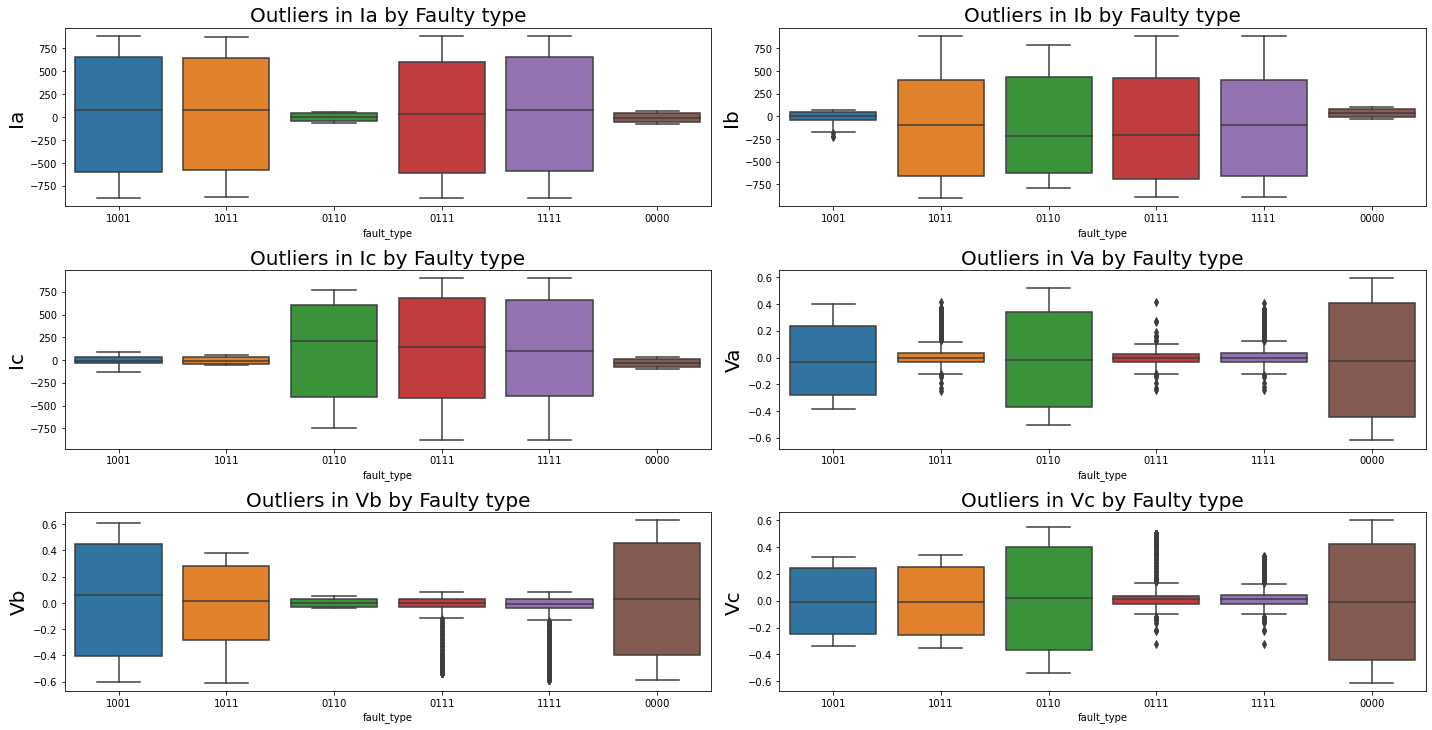

In [16]:
# Box Plot for all type of faults.
fig=plt.figure(figsize=(20,30))
for i in range(0, len(numerical_features)):
  ax=fig.add_subplot(9,2,i+1)
  sns.boxplot(y=df[numerical_features].columns[i], data=df[numerical_features], x=df['fault_type'], ax=ax) 
  plt.title('Outliers in {} by Faulty type'.format(numerical_features[i]),fontsize=20)
  ax.yaxis.label.set_size(20)
plt.tight_layout()
plt.show()

### Inferences:-
1. Current in Phase A is less spread in case of No Fault and Fault between B phase & C phase.
2. Current in Phase B is less spread in case of No Fault and Fault between A phase & Ground.
3. Current in Phase C is less spread in case of No Fault and Fault between A phase, B phase & Ground.
4. Voltage in Phase A is less spread and has outliers in case of Fault between Phase A, B & Ground, Fault between all three phases and Three Phase Symmetrical Fault.
5. Voltage in Phase B is less spread for Fault between Phase B &C and has outliers in case of Fault between all three phases & Three Phase Symmetrical Fault.
6. Voltage in Phase C is less spread and has outliers in case of Fault between all three phases & Three Phase Symmetrical Fault.

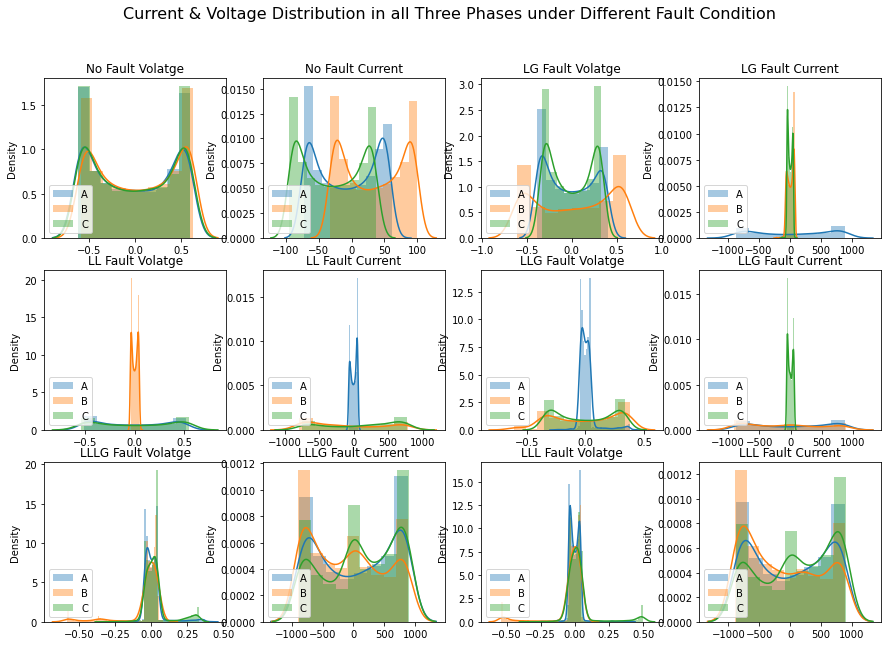

In [56]:
# Current and Voltage distribution plot for all type of faults.
fig, ((ax1, ax2, ax3,ax4), (ax5, ax6,ax7,ax8),(ax9,ax10, ax11, ax12)) = plt.subplots(3, 4)
fig.set_size_inches(15,10)

a = sns.distplot(x=df_no_fault['Va'],label='A',ax=ax1)
a = sns.distplot(x=df_no_fault['Vb'],label='B',ax=ax1)
a = sns.distplot(x=df_no_fault['Vc'],label='C',ax=ax1)
ax1.legend( loc=3)
ax1.set_title('No Fault Volatge')
a = sns.distplot(x=df_no_fault['Ia'],label='A',ax=ax2)
a = sns.distplot(x=df_no_fault['Ib'],label='B',ax=ax2)
a = sns.distplot(x=df_no_fault['Ic'],label='C',ax=ax2)
ax2.legend( loc=3)
ax2.set_title('No Fault Current')

a = sns.distplot(x=df_LG_fault['Va'],label='A',ax=ax3)
a = sns.distplot(x=df_LG_fault['Vb'],label='B',ax=ax3)
a = sns.distplot(x=df_LG_fault['Vc'],label='C',ax=ax3)
ax3.legend( loc=3)
ax3.set_title('LG Fault Volatge')
a = sns.distplot(x=df_LG_fault['Ia'],label='A',ax=ax4)
a = sns.distplot(x=df_LG_fault['Ib'],label='B',ax=ax4)
a = sns.distplot(x=df_LG_fault['Ic'],label='C',ax=ax4)
ax4.legend( loc=3)
ax4.set_title('LG Fault Current')

a = sns.distplot(x=df_LL_fault['Va'],label='A',ax=ax5)
a = sns.distplot(x=df_LL_fault['Vb'],label='B',ax=ax5)
a = sns.distplot(x=df_LL_fault['Vc'],label='C',ax=ax5)
ax5.legend( loc=3)
ax5.set_title('LL Fault Volatge')
a = sns.distplot(x=df_LL_fault['Ia'],label='A',ax=ax6)
a = sns.distplot(x=df_LL_fault['Ib'],label='B',ax=ax6)
a = sns.distplot(x=df_LL_fault['Ic'],label='C',ax=ax6)
ax6.legend( loc=3)
ax6.set_title('LL Fault Current')

a = sns.distplot(x=df_LLG_fault['Va'],label='A',ax=ax7)
a = sns.distplot(x=df_LLG_fault['Vb'],label='B',ax=ax7)
a = sns.distplot(x=df_LLG_fault['Vc'],label='C',ax=ax7)
ax7.legend( loc=3)
ax7.set_title('LLG Fault Volatge')
a = sns.distplot(x=df_LLG_fault['Ia'],label='A',ax=ax8)
a = sns.distplot(x=df_LLG_fault['Ib'],label='B',ax=ax8)
a = sns.distplot(x=df_LLG_fault['Ic'],label='C',ax=ax8)
ax8.legend( loc=3)
ax8.set_title('LLG Fault Current')

a = sns.distplot(x=df_LLLG_fault['Va'],label='A',ax=ax9)
a = sns.distplot(x=df_LLLG_fault['Vb'],label='B',ax=ax9)
a = sns.distplot(x=df_LLLG_fault['Vc'],label='C',ax=ax9)
ax9.legend( loc=3)
ax9.set_title('LLLG Fault Volatge')             
a = sns.distplot(x=df_LLLG_fault['Ia'],label='A',ax=ax10)
a = sns.distplot(x=df_LLLG_fault['Ib'],label='B',ax=ax10)
a = sns.distplot(x=df_LLLG_fault['Ic'],label='C',ax=ax10)
ax10.legend( loc=3)
ax10.set_title('LLLG Fault Current')

a = sns.distplot(x=df_LLL_fault['Va'],label='A',ax=ax11)
a = sns.distplot(x=df_LLL_fault['Vb'],label='B',ax=ax11)
a = sns.distplot(x=df_LLL_fault['Vc'],label='C',ax=ax11)
ax11.legend( loc=3)
ax11.set_title('LLL Fault Volatge')
a = sns.distplot(x=df_LLL_fault['Ia'],label='A',ax=ax12)
a = sns.distplot(x=df_LLL_fault['Ib'],label='B',ax=ax12)
a = sns.distplot(x=df_LLL_fault['Ic'],label='C',ax=ax12)
ax12.legend( loc=3)
ax12.set_title('LLL Fault Current')

fig.suptitle('Current & Voltage Distribution in all Three Phases under Different Fault Condition',fontsize=16)
plt.show()

### Inferences:-
1. In case of No Fault current and voltage in all phase have symmetrical distribution.
2. In Case of Fault Baetween Phase A & Ground,current in Phase A is widely distributed with lesser density.
3. In Case of Fault between Phase B & C, Voltage for Phase A & C and Current for Phase B & C is widely distributed with lesser density.
4. In Case of Fault between Phases A, B & Ground, Voltage for Phase B & C and Current for Phase A & B is widely distributed with lesser density.
5. In case of Fault between all three phase and Three Phase Symmetrical Fault, Current and Voltage distribution is symmetrical for all phases.

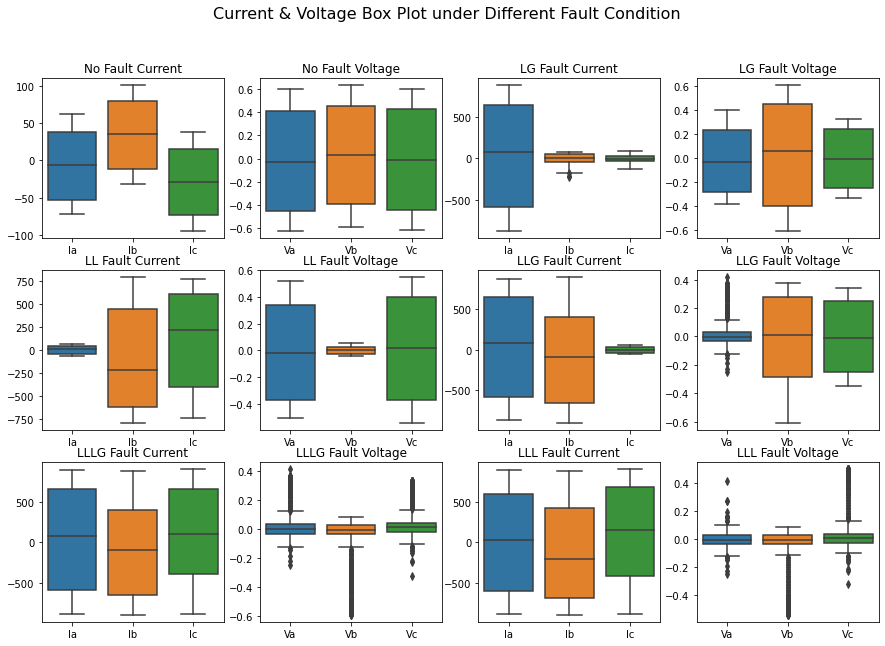

In [61]:
# Current & Voltage Box Plot under Different Fault Condition
fig, ((ax1, ax2, ax3,ax4), (ax5, ax6,ax7,ax8),(ax9,ax10, ax11, ax12)) = plt.subplots(3, 4)
fig.set_size_inches(15,10)
a= sns.boxplot(data=df_no_fault[['Ia','Ib','Ic']], ax=ax1)
ax1.set_title('No Fault Current')
a= sns.boxplot(data=df_no_fault[['Va','Vb','Vc']], ax=ax2)
ax2.set_title('No Fault Voltage')
a= sns.boxplot(data=df_LG_fault[['Ia','Ib','Ic']], ax=ax3)
ax3.set_title('LG Fault Current')
a= sns.boxplot(data=df_LG_fault[['Va','Vb','Vc']], ax=ax4)
ax4.set_title('LG Fault Voltage')
a= sns.boxplot(data=df_LL_fault[['Ia','Ib','Ic']], ax=ax5)
ax5.set_title('LL Fault Current')
a= sns.boxplot(data=df_LL_fault[['Va','Vb','Vc']], ax=ax6)
ax6.set_title('LL Fault Voltage')
a= sns.boxplot(data=df_LLG_fault[['Ia','Ib','Ic']], ax=ax7)
ax7.set_title('LLG Fault Current')
a= sns.boxplot(data=df_LLG_fault[['Va','Vb','Vc']], ax=ax8)
ax8.set_title('LLG Fault Voltage')
a= sns.boxplot(data=df_LLLG_fault[['Ia','Ib','Ic']], ax=ax9)
ax9.set_title('LLLG Fault Current')
a= sns.boxplot(data=df_LLLG_fault[['Va','Vb','Vc']], ax=ax10)
ax10.set_title('LLLG Fault Voltage')
a= sns.boxplot(data=df_LLL_fault[['Ia','Ib','Ic']], ax=ax11)
ax11.set_title('LLL Fault Current')
a= sns.boxplot(data=df_LLL_fault[['Va','Vb','Vc']], ax=ax12)
ax12.set_title('LLL Fault Voltage')
fig.suptitle('Current & Voltage Box Plot under Different Fault Condition',fontsize=16)
plt.show()

### 
### Inferences:-
1. In case of No Fault current and voltage in all phase have symmetrical distribution.
2. In Case of Fault Baetween Phase A & Ground,Current in Phase B has Outliers.
3. In Case of Fault between Phase A, B & Ground, Voltage in Phase A has Outliers.
4. In case of Fault between all three phase and Three Phase Symmetrical Fault, All phases Voltage has outliers.

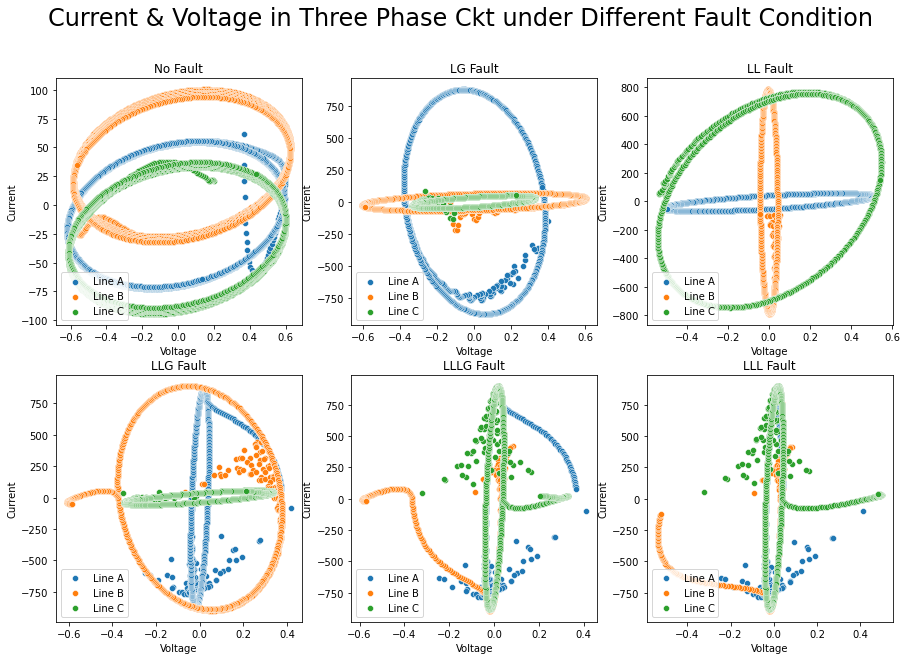

In [146]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
fig.set_size_inches(15,10)
a = sns.scatterplot(x=df_no_fault['Va'], y=df_no_fault['Ia'],label='Line A',ax=ax1 )

a = sns.scatterplot(x=df_no_fault['Vb'], y=df_no_fault['Ib'],label='Line B',ax=ax1)

a = sns.scatterplot(x=df_no_fault['Vc'], y=df_no_fault['Ic'],label='Line C',ax=ax1 )
ax1.legend( loc=3)
ax1.set_title('No Fault')
ax1.set_xlabel('Voltage')
ax1.set_ylabel('Current')

a = sns.scatterplot(x=df_LG_fault['Va'], y=df_LG_fault['Ia'],label='Line A',ax=ax2 )

a = sns.scatterplot(x=df_LG_fault['Vb'], y=df_LG_fault['Ib'],label='Line B',ax=ax2 )

a = sns.scatterplot(x=df_LG_fault['Vc'], y=df_LG_fault['Ic'],label='Line C',ax=ax2 )
ax2.legend( loc=3)
ax2.set_title('LG Fault')
ax2.set_xlabel('Voltage')
ax2.set_ylabel('Current')

a = sns.scatterplot(x=df_LL_fault['Va'], y=df_LL_fault['Ia'],label='Line A',ax=ax3 )

a = sns.scatterplot(x=df_LL_fault['Vb'], y=df_LL_fault['Ib'],label='Line B',ax=ax3 )

a = sns.scatterplot(x=df_LL_fault['Vc'], y=df_LL_fault['Ic'],label='Line C',ax=ax3 )
ax3.legend( loc=3)
ax3.set_title('LL Fault')
ax3.set_xlabel('Voltage')
ax3.set_ylabel('Current')
a = sns.scatterplot(x=df_LLG_fault['Va'], y=df_LLG_fault['Ia'],label='Line A',ax=ax4 )

a = sns.scatterplot(x=df_LLG_fault['Vb'], y=df_LLG_fault['Ib'],label='Line B',ax=ax4 )

a = sns.scatterplot(x=df_LLG_fault['Vc'], y=df_LLG_fault['Ic'],label='Line C',ax=ax4 )
ax4.legend( loc=3)
ax4.set_title('LLG Fault')
ax4.set_xlabel('Voltage')
ax4.set_ylabel('Current')
a = sns.scatterplot(x=df_LLLG_fault['Va'], y=df_LLLG_fault['Ia'],label='Line A',ax=ax5 )

a = sns.scatterplot(x=df_LLLG_fault['Vb'], y=df_LLLG_fault['Ib'],label='Line B',ax=ax5 )

a = sns.scatterplot(x=df_LLLG_fault['Vc'], y=df_LLLG_fault['Ic'],label='Line C',ax=ax5 )
ax5.legend( loc=3)
ax5.set_title('LLLG Fault')
ax5.set_xlabel('Voltage')
ax5.set_ylabel('Current')
a = sns.scatterplot(x=df_LLL_fault['Va'], y=df_LLL_fault['Ia'],label='Line A',ax=ax6 )

a = sns.scatterplot(x=df_LLL_fault['Vb'], y=df_LLL_fault['Ib'],label='Line B',ax=ax6 )

a = sns.scatterplot(x=df_LLL_fault['Vc'], y=df_LLL_fault['Ic'],label='Line C',ax=ax6 )
ax6.legend( loc=3)
ax6.set_title('LLL Fault')
ax6.set_xlabel('Voltage')
ax6.set_ylabel('Current')
fig.suptitle('Current & Voltage in Three Phase Ckt under Different Fault Condition',fontsize=24)
plt.show()


### Inferences:-
1. Only in case of No Fault, current and voltage has some relationship.
2. In case of Fault between Phase A and Ground, current in Phase B & C is varying around zero but voltage is varying in complete range.
3. In case of Fault between Phase B & C, current in Phase A is varying around zero and Voltage in Phase B varying around zero.
4. In case of Fault between Phase A , B & Ground, current in phase C is varying around zero.


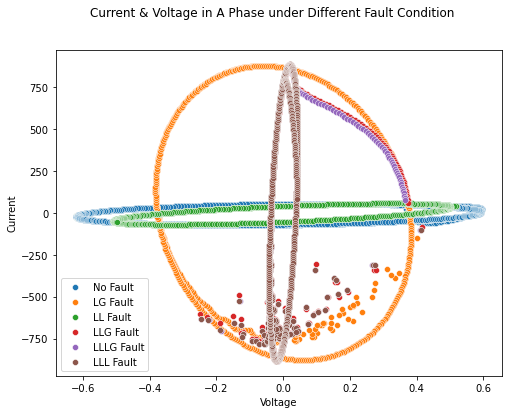

In [154]:
fig, (ax) = plt.subplots()
fig.set_size_inches(8,6)
a = sns.scatterplot(x=df_no_fault['Va'], y=df_no_fault['Ia'],label='No Fault',ax=ax )
a = sns.scatterplot(x=df_LG_fault['Va'], y=df_LG_fault['Ia'],label='LG Fault',ax=ax )
a = sns.scatterplot(x=df_LL_fault['Va'], y=df_LL_fault['Ia'],label='LL Fault',ax=ax )
a = sns.scatterplot(x=df_LLG_fault['Va'], y=df_LLG_fault['Ia'],label='LLG Fault',ax=ax )
a = sns.scatterplot(x=df_LLLG_fault['Va'], y=df_LLLG_fault['Ia'],label='LLLG Fault',ax=ax)
a = sns.scatterplot(x=df_LLL_fault['Va'], y=df_LLL_fault['Ia'],label='LLL Fault',ax=ax)
ax.legend( loc=3)
ax.set_xlabel('Voltage')
ax.set_ylabel('Current')
fig.suptitle('Current & Voltage in A Phase under Different Fault Condition',fontsize=12)
plt.show()

### Inferences:-
1. In case of No Fault and Fault between Phase B & C, the current has very thin spread but the voltage is widely spread.
2. In case of all phase fault, the voltage has very thin spread but current is widely spread.

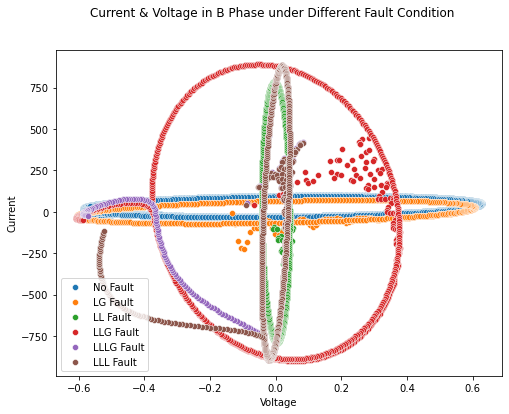

In [153]:
fig, (ax) = plt.subplots()
fig.set_size_inches(8,6)
a = sns.scatterplot(x=df_no_fault['Vb'], y=df_no_fault['Ib'],label='No Fault',ax=ax )
a = sns.scatterplot(x=df_LG_fault['Vb'], y=df_LG_fault['Ib'],label='LG Fault',ax=ax )
a = sns.scatterplot(x=df_LL_fault['Vb'], y=df_LL_fault['Ib'],label='LL Fault',ax=ax )
a = sns.scatterplot(x=df_LLG_fault['Vb'], y=df_LLG_fault['Ib'],label='LLG Fault',ax=ax )
a = sns.scatterplot(x=df_LLLG_fault['Vb'], y=df_LLLG_fault['Ib'],label='LLLG Fault',ax=ax)
a = sns.scatterplot(x=df_LLL_fault['Vb'], y=df_LLL_fault['Ib'],label='LLL Fault',ax=ax)
ax.legend( loc=3)
ax.set_xlabel('Voltage')
ax.set_ylabel('Current')
fig.suptitle('Current & Voltage in B Phase under Different Fault Condition',fontsize=12)
plt.show()

### Inferences:-
1. In case of No Fault and Fault between Phase A & Ground, the current has very thin spread but the voltage is widely spread.
2. In case of all phase fault, the voltage has very thin spread but current is widely spread.

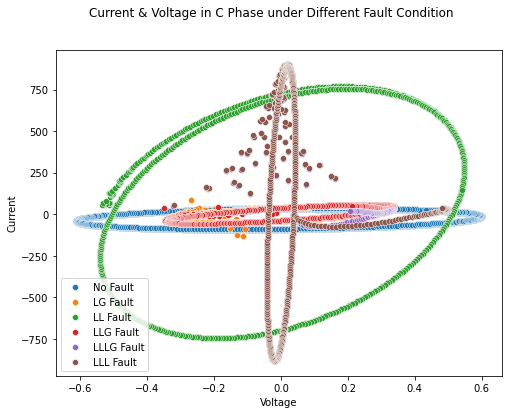

In [155]:
fig, (ax) = plt.subplots()
fig.set_size_inches(8,6)
a = sns.scatterplot(x=df_no_fault['Vc'], y=df_no_fault['Ic'],label='No Fault',ax=ax )
a = sns.scatterplot(x=df_LG_fault['Vc'], y=df_LG_fault['Ic'],label='LG Fault',ax=ax )
a = sns.scatterplot(x=df_LL_fault['Vc'], y=df_LL_fault['Ic'],label='LL Fault',ax=ax )
a = sns.scatterplot(x=df_LLG_fault['Vc'], y=df_LLG_fault['Ic'],label='LLG Fault',ax=ax )
a = sns.scatterplot(x=df_LLLG_fault['Vc'], y=df_LLLG_fault['Ic'],label='LLLG Fault',ax=ax)
a = sns.scatterplot(x=df_LLL_fault['Vc'], y=df_LLL_fault['Ic'],label='LLL Fault',ax=ax)
ax.legend( loc=3)
ax.set_xlabel('Voltage')
ax.set_ylabel('Current')
fig.suptitle('Current & Voltage in C Phase under Different Fault Condition',fontsize=12)
plt.show()

### Inferences:-
1. In case of No Fault and Fault between Phase A, B & Ground, the current has very thin spread but the voltage is widely spread.
2. In case of all phase fault, the voltage has very thin spread but current is widely spread.